# CS5228 Assignment 1 - EDA, Data Preparation & K-Means

Hello everyone, this assignment notebook covers EDA, Data Preparation & K-Means. There are some code-completion tasks and question-answering tasks in this answer sheet. For code completion tasks, please write down your answer (i.e., your lines of code) between sentences that "Your code starts here" and "Your code ends here". The space between these two lines does not reflect the required or expected lines of code. For answers in plain text, you can refer to [this Markdown guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) to customize the layout (although it shouldn't be needed).

When you work on this notebook, you can insert additional code cells (e.g., for testing) or markdown cells (e.g., to keep track of your thoughts). However, before the submission, please remove all those additional cells again. Thanks!

**Important:**
* Rename and save this Jupyter notebook as **cs5228_a1_YourName_YourNUSNETID.ipynb** (e.g., **cs5228_a1_BobSmith_e12345678.ipynb**) before submission!
* Rename and save the script file *cs5228_a1_script.py* as **cs5228_a1_YourName_YourNUSNETID.py** (e.g., **cs5228_a1_BobSmith_e12345678.py**) before submission!
* Submission deadline is **Thursday, Sep 14, 11.59 pm**. Late submissions will be penalized by 10% for each additional day. Failure to appropriately rename both files will yield a penalty of 1 Point. There is no need to use your full name if it's rather long; it's just  important to easily identify you in Canvas etc.

Please also add your NUSNET and student id in the code cell below. This is just to make any identification of your notebook doubly sure.

In [27]:
student_id = 'A0286970M'
nusnet_id = 'E1268038'

Here is an overview over the tasks to be solved and the points associated with each task. The notebook can appear very long and verbose, but note that a lot of parts provide additional explanations, documentation, or some discussion. The code and markdown cells you are supposed to complete are well, but you can use the overview below to double-check that you covered everything.

* **1 Exploratory Data Analysis (EDA) & Data Preparation (30 Points)**
    * 1.1 Removing "Dirty" Records (6 Points)
    * 1.2 Handling Missing (NaN) Values (6 Points)
    * 1.3 Other Appropriate Data Cleaning / Preprocessing Steps (6 Points)
        * 1.3 a) Appropriate Steps (4 Points)
        * 1.3 b) Additional Considerations (2 Points)
    * 1.4 Handling Categorical Attributes (4 Points)
    * 1.5 Basic Facts about Dataset (8 Points)
* **2 K-Means (20 Points)**
    * 2.1 Performing K-Means "By Hand" (4 Points)
        * 2.1 a) Find Clusters for K=3 (2 Points)
        * 2.1 b) Evaluate the Result (2 Points)
    * 2.2 Initializing Centroids (10 Points)
        * 2.2 a) Implement Initialization of Centroids (6 Points)
        * 2.2 b) Interpreting MaxDist Initialization (2 Points)
        * 2.2 c) Interpreting KMeans++ Initialization (2 Points)
    * 2.3 Questions about K-Means (6 Points)
        * 2.3 a) Empty Cluster (3 Points)
        * 2.3 b) Outlier Detection (3 Points)

## Setting up the Notebook

### Enable Auto-Reload

This ensures that any saved changes to your `.py` file gets automatically reloaded.

In [28]:
%load_ext autoreload
%autoreload 2

### Enable "Inline Plotting"

In [29]:
%matplotlib inline

### Importing Required Packages

In [30]:
import numpy as np
import pandas as pd

from src.utils import *

**Important:** This notebook also requires you to complete in a separate `.py` script file. This keeps this notebook cleaner and simplifies testing your implementations for us. As you need to rename the file `cs5228_a1.py`, you also need to edit the import statement below accordingly.

In [31]:
from cs5228_a1_WuXiangjiekang_E1268038 import *
#from A1a_BobSmith_e12345678 import * # <-- you will need to rename this accordingly

---

## 1. Exploratory Data Analysis (EDA) & Data Preparation

### 1.1 Removing "Dirty" Records (6 Points)

Assume that you have been tasked to build a regression model to predict the **resale prices of used cars** in Singapore. To this end, you get a dataset containing information about 15,000 past resale transactions, including the following information about the attributes:

* **listing_id**: Unique ID of the listing; an integer number uniquely assigned to each listing. If this code starts with the letter 'C', it indicates a cancellation of the listing and is this an invalid listing.
* **url**: URL of the website where the listing is posted as string value
* **make**: The make/brand of the car as a string value of a valid car make (e.g., "bmw", "honda", "mazda", "toyota", "mercedes-benz").
* **model**: The model of the car as a string value of a valid car model (e.g., "e250", "outlander", "v60", "x1", "qashqai").
* **manufactured**: The year the car has been manufactured as an integer value.
* **type_of_vehicle**: The type of the car as a string value of a valid vehicle type (e.g., "luxury sedan", "mid-sized sedan", "suv", "hatchback").
* **power**: The power of the engine as an integer value in kW (kilowatt)
* **engine_cap**: Size/capacity of the engine as integer value in cc (cubic centimeter)
* **curb_weight**: the weight of the vehicle including a full tank of fuel and all standard equipment in kg (kilogram)
* **no_of_owners**: Number of previous owners as integer value >= 1 (used cars only).
* **mileage**: Mileage of car as integer value in km (kilometer)
* **price**: Resale price of the car in Singapore dollars.

Let's have a first look at the data:

In [32]:
df_cars_dirty = pd.read_csv('data/a1-used-cars-resale-dirty.csv')

df_cars_dirty.head()

,listing_id,url,make,model,manufactured,type_of_vehicle,power,engine_cap,curb_weight,no_of_owners,mileage,price
0,983884,https://www.sgcarmart.com/listing/983884,nissan,qashqai,2015,suv,85,1197,1285,2,80000,52800
1,1026259,https://www.sgcarmart.com/listing/1026259,volkswagen,golf,2010,sports car,188,1984,1466,6,149000,105800
2,1002033,https://www.sgcarmart.com/listing/1002033,suzuki,vitara,2016,suv,88,1586,1160,1,84000,55800
3,1030109,https://www.sgcarmart.com/listing/1030109,kia,picanto,2007,hatchback,47,1086,852,2,105000,8888
4,1013252,https://www.sgcarmart.com/listing/1013252,porsche,cayenne,2014,suv,193,2967,2185,3,108650,162800


In [33]:
print('Number of records: {}'.format(len(df_cars_dirty)))

Number of records: 15000


If you check the dataset against its description as given above -- with the help of `pandas` or by simply inspecting the raw data file -- you will notice that many records are "dirty", meaning they are not in the expected format. Dirty records can negatively affect any subsequent analysis it needs.

**Perform EDA on the Used Cars Resale Price dataset and perform appropriate preprocessing steps to clean the data!**
The preprocessing step for cleaning the data step may include
* the *removal* of "dirty records" or
* the *modification* of "dirty records" records

**Task 1: Identify at least 3 issues** with the dataset that would negatively affect any subsequent analysis, and clean the data accordingly.

**Important:**

* Recall from the lecture that data cleaning often involves making certain decisions. As such, you might come up with different steps than other students. This is OK as long as you can reasonably justify your steps.
* The goal is to preserve as much of the records as possible! So only remove records as part of your data cleaning if it's really necessary (this includes that you should not remove any attributes!). There might be different valid cases, so don't forget to briefly justify your decision.
* For this task, we are **not** trying to identify "noise" (e.g., outliers in the form of suspicious values) or `NaN` values; this will be covered later. Here, we look for records with values not eligible to be used for an analysis because they do not adhere to the data description.

Please provide your answer below. It should list the different issues you have identified and briefly discuss which data cleaning steps you can and/or need to perform to address those issues.

**Your answer:**

**Issue 1: Negative values in the 'no_of_owners' column**
* In the *'no_of_owners'* columns, there are negtive values(-1)
* In this context negative number of owner does not make sense, so we can replace the nagative values in the 'no_of_column' with missing value representation(e.g. NaN)

**Issue 2: Missing values in the 'curb_weight' column**
* In the *'curb_weight'* column, there are missing values that are represented as "XXXXX"
* These missing values need to be addressed for any analysis involving curb weight, therefore we can replace them with NaN

**Issue 3: Incorrect data in the 'manufactured' column**
* In the *'manufactured'* column, there are some records that are clearly wrong(e.g. 2116)
* Those data that are in the 22th century should be corrected to 21th century.

**Task 2: Complete the method `clean` in the `.py` file to actually implement your steps for handling "dirty" records!** The results should back up your answer above. Hint: Try to use methods/functionalities provided by `pandas` as much as possible; it will make your code much shorter, faster and your life easier. We will run performance checks for this method to evaluate the runtime, but the performance is not considered for the grading!

In [34]:
df_cars_cleaned = clean(df_cars_dirty)

print('After preprocessing, there are now {} records.'.format(df_cars_cleaned.shape[0]))

# print(df_cars_cleaned.iloc[53])
# file_path = 'cleaned_cars_data.xlsx'
# df_cars_cleaned.to_excel(file_path)

After preprocessing, there are now 15000 records.


### 1.2 Handling Missing (NaN) Values (6 Points)

Many traditional data mining algorithms do not like missing (NaN) values and will throw an error if missing values are present. We therefore have to address missing values and get rid of them. On the other hand, we want to preserve as much of our dataset as possible, so we need to be smart about that. In this subtask, you are provided with a version of our used cars resale dataset that contains missing values but is otherwise clean -- so it is all about the `NaN` values here.

Let's load the dataset and have a quick look -- the attributes are the same as before:

In [35]:
df_cars_nan = pd.read_csv('data/a1-used-cars-resale-nan.csv')

df_cars_nan.head()

,listing_id,url,make,model,manufactured,type_of_vehicle,power,engine_cap,curb_weight,no_of_owners,mileage,price
0,1023911,https://www.sgcarmart.com/listing/1023911,toyota,corolla,2009,mid-sized sedan,81,1496,1130.0,3,127450.0,20800.0
1,1022346,https://www.sgcarmart.com/listing/1022346,toyota,estima,2007,mpv,125,2362,1710.0,4,103000.0,52500.0
2,1017880,https://www.sgcarmart.com/listing/1017880,citroen,c3,2018,suv,81,1199,1203.0,1,35000.0,68000.0
3,1022468,https://www.sgcarmart.com/listing/1022468,renault,grand,2015,mpv,81,1461,1539.0,1,80848.0,52800.0
4,1026440,https://www.sgcarmart.com/listing/1026440,mercedes-benz,e200,2009,luxury sedan,135,1796,1615.0,2,116199.0,73800.0


Since your decision for handling `NaN` values might depend in the data mining task, assume in the following that you want to use this dataset to **create a regression model to predict the resale price** from the attributes of a transaction. Of course, there will be no need to actually create such a model here.

**Task 1: Identify all `NaN` values in the dataset and handle them appropriately!** After this preprocessing, the resulting dataset should no longer contain any `NaN` values. Please provide your answer in the markdown cell below list all issues concerning `NaN` values and how you would handle them with a brief justification for your approach. Additional (simplifying) guidelines:

* The goal is to preserve as many records in the dataset as possible.
* You do not need to consider external knowledge (i.e., information coming from outside this dataset)
* Ignore more sophisticated solutions such as [`sklearn.impute.KNNImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html). These can be very useful in practice (and maybe for your project), but their application requires certain assumptions to hold for good results. This is beyond the scope of this assignment.

**Your Answer:**

In [36]:
missing_value_col1 = df_cars_nan['listing_id'].isna().sum()
missing_value_col2 = df_cars_nan['url'].isna().sum()
missing_value_col3 = df_cars_nan['make'].isna().sum()
missing_value_col4 = df_cars_nan['model'].isna().sum()
missing_value_col5 = df_cars_nan['manufactured'].isna().sum()
missing_value_col6 = df_cars_nan['type_of_vehicle'].isna().sum()
missing_value_col7 = df_cars_nan['power'].isna().sum()
missing_value_col8 = df_cars_nan['engine_cap'].isna().sum()
missing_value_col9 = df_cars_nan['curb_weight'].isna().sum()
missing_value_col10 = df_cars_nan['no_of_owners'].isna().sum()
missing_value_col11 = df_cars_nan['mileage'].isna().sum()
missing_value_col12 = df_cars_nan['price'].isna().sum()

print("Number of missing values in 'listing_id' column:", missing_value_col1 )
print("Number of missing values in 'url column:", missing_value_col2 )
print("Number of missing values in 'make' column:", missing_value_col3 )
print("Number of missing values in 'model' column:", missing_value_col4 )
print("Number of missing values in 'manufactured' column:", missing_value_col5 )
print("Number of missing values in 'type_of_vehicle' column:", missing_value_col6 )
print("Number of missing values in 'power' column:", missing_value_col7 )
print("Number of missing values in 'engine_cap' column:", missing_value_col8 )
print("Number of missing values in 'curb_weight' column:", missing_value_col9 )
print("Number of missing values in 'no_of_owners' column:", missing_value_col10 )
print("Number of missing values in 'mileage' column:", missing_value_col11 )
print("Number of missing values in 'price' column:", missing_value_col12 )

Number of missing values in 'listing_id' column: 0
Number of missing values in 'url column: 1503
Number of missing values in 'make' column: 987
Number of missing values in 'model' column: 0
Number of missing values in 'manufactured' column: 0
Number of missing values in 'type_of_vehicle' column: 0
Number of missing values in 'power' column: 0
Number of missing values in 'engine_cap' column: 0
Number of missing values in 'curb_weight' column: 0
Number of missing values in 'no_of_owners' column: 0
Number of missing values in 'mileage' column: 741
Number of missing values in 'price' column: 445


After using isna() function, I foud 4 columns with NaN value. For the **'url'** column , when encounter a NaN value browse through the dataset and find a record with same **'model'** and use the **'url'** to fill in the NaN. For **'make'** column, similarly find a record with same model and use the **'make'** to fill in the NaN. For the **'mileage'** and **'price'** column, fill in the NaN with mean value since it helps to preserve the distribution of the data.

**Task 2: Complete the method `handle_nan` in the `.py` file to actually implement your steps for handling `NaN` values!** The results should back up your answer above. Hint: Try to use methods/functionalities provided by `pandas` as much as possible; it will make your code much shorter, faster and your life easier. We will run performance checks for this method to evaluate the runtime, but the performance is not considered for the grading!

In [37]:
df_cars_no_nan = handle_nan(df_cars_nan)

print('After handling missing values, there are now {} records.'.format(df_cars_no_nan.shape[0]))
print('Number of records with an NaN for any attribute: {}'.format((df_cars_no_nan.isna().sum(axis=1) > 0).sum()))

After handling missing values, there are now 15000 records.
Number of records with an NaN for any attribute: 0


### 1.3 Other Appropriate Data Cleaning / Preprocessing Steps (6 Points)

Identifying "dirty" records and missing data are two very fundamental and generally rather systematic steps as part of data cleaning / data preprocessing. However, as we saw in the lecture using some examples, there are many other issues with the dataset that can be considered noise and thus potentially negatively affecting any data analysis. So the more noise we can remove, the more likely we can expect meaning analysis results.

For this subtask, we use a version of our Used Cars Resale dataset **with no "dirty" records or missing data**! Note that this dataset has a few more attributes: `eco_category`, `transmission`, and `reg_date` (registration date). Let's have a look:

In [38]:
df_cars_others = pd.read_csv('data/a1-used-cars-resale-other.csv')

df_cars_others.head()

,listing_id,url,make,model,manufactured,reg_date,type_of_vehicle,eco_category,transmission,power,engine_cap,curb_weight,no_of_owners,mileage,price
0,1004862,https://www.sgcarmart.com/listing/1004862,Lamborghini,gallardo,2011,06-jan-2012,sports car,uncategorized,auto,412,5204,1500,5,49000,362800
1,1004953,https://www.sgcarmart.com/listing/1004953,Mitsubishi,attrage,2016,31-jul-2017,mid-sized_sedan,uncategorized,auto,57,1193,940,2,90000,43800
2,1031276,https://www.sgcarmart.com/listing/1031276,toyota,vios,2018,21-nov-2018,mid-sized sedan,uncategorized,auto,79,1496,1085,1,20270,56666
3,1024287,https://www.sgcarmart.com/listing/1024287,volkswagen,golf,2016,18-nov-2016,hatchback,uncategorized,auto,81,1197,1229,1,60000,54200
4,1023453,https://www.sgcarmart.com/listing/1023453,bmw,216d,2016,24-nov-2016,mpv,uncategorized,auto,85,1496,1480,2,80000,103000


#### 1.3 a) Appropriate Steps (4 Points)

**List at least 4 data cleaning / data preprocessing steps you deem appropriate to apply to the dataset above!** Please provide your answer in the markdown cell below list all steps together with a justification for your decision. Additional (simplifying) guidelines:

* You should still assume that we want to use this dataset to create a model for predicting the resale price of a flat based on its attributes. The choice of data mining task is very likely to affect your decision for what cleaning / preprocessing steps to apply.
* There is no need to consider external knowledge. For example, you do not have to check if a value for `model` is indeed an existing car model.
* Please do not address the concept of attribute encoding -- that is, the encoding of categorical attributes as numerical attributes -- in this subtask. This comes later.
* There is no need for you to implement any processing steps! Most important are your justifications for your decisions.

**Your Answer:**

**1. Convert date columns like 'manufactured' and 'reg_date' to datetime format.**
* This will allow us to perform date-based operations and extract useful features from these columns during analysis or modeling.
* Converting date columns to datetime format makes it easier to work with date-related features and enables you to calculate the age of the vehicles accurately.

**2. Create a new feature for the age of the vehicles by subtracting 'manufactured' from the current date.**
* The age of the vehicle can be an important factor in predicting resale price.

**3. Check for outliers in numerical columns like 'mileage,' 'power,' 'engine_cap,' 'curb_weight,' and 'price.'**
* Outliers can significantly affect the model's performance, and removing or transforming them can improve model accuracy.

**4. Remove Duplicated Records**
* Removing duplicated records ensures data consistency and reliability. Duplicate entries may arise due to data entry errors, system glitches, or other issues.
* When building predictive models, duplicated records can cause model instability and reduce predictive accuracy.
* Working with a clean dataset containing unique records streamlines data processing and analysis tasks. Duplicate records increase the computational load and memory usage, which can be inefficient and time-consuming. 

#### 1.3 b) Additional Considerations (2 Points)

So far, we handled "dirty" records, missing values, and other types of (arguably) straightforward EDA/preprocessing steps. This means that we performed important steps towards ensuring a minimum level of data quality to, in turn, enable a successful data analysis and meaningful results. However, this does not mean that our dataset is now free of any noise.

**Briefly discuss what other kind of noise our dataset might still contain?** Include a brief explanation if and how we could identify and handle these instances of noisy data -- if possible in a meaningful way. There is no need to analyze and check the dataset to find any examples. This question is mainly to motivate some additional thinking.

**Your Answer:**

**1. Inconsistent Data Formats**
* Inconsistencies in data formats can lead to noise. For instance, inconsistent date formats, currency symbols, or units of measurement can make it challenging to perform meaningful analysis.
* Example: In the 'price' column, some entries use commas as thousands separators (e.g., `$`12,345), while others do not (e.g., `$`12345).
* How to resolve: Standardize the format by removing commas and converting all values to a consistent numerical format.

**2. Inaccurate or Incomplete Data**
* Noise may arise from inaccuracies or incompleteness in the dataset. This includes incorrect values, outdated information, or missing attributes that are essential for analysis. 
* Example: The 'power' column contains unrealistically high values, such as a vehicle with 10,000 horsepower.
* Validate data against realistic ranges. For 'power,' consider removing or correcting entries that exceed a reasonable upper limit based on the type of vehicles listed.


### 1.4 Handling Categorical Attributes (4 Points)

Many to most data mining algorithms require all input features / attributes to be numerical. Our dataset with transactions resales of condo flats contains attributes that are not all numerical. As such, assuming we indeed want to utilize them, we need to convert those attributes into numerical ones. Regarding encoding techniques, we covered [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) in the lecture, and also talked about [Target Encoding](https://contrib.scikit-learn.org/category_encoders/targetencoder.html) in the tutorial; you can and should also look into other encoding techniques.

For this task, we assume the same dataset file used in 1.3 (`a1-used-cars-resale-others.csv`).

**Briefly(!) discuss how you would handle each categorical attribute and justify why!** Handling a categorical attribute means
* to drop a categorical attribute *or*
* to encode it into a numerical representation *or*
* to otherwise transform it into a numerical attribute

There is no single correct answer for this task; it's your justification that matters. Again, assume that we want to create a regression model to predict the resale price of a flat based on the other features.

**Your Answer:**

**Make and model**
* For these two categories we can use one-hot encodeing to handle them. Each unique make and model combination would become a separate binary column to indicate the presence or absence of that combination.
* This allows us to capture the relationship or the price with any specific combination of model and make.
* One hot encoding treats each combination as a distinct category, which is essential as different car makes and models may have unique impacts on resale prices.

**Type_of_vehicle**
* This attribute indicates different types of vehicles, such as "mid-sized sedan", "sports car". This attribute can also be encoded with one-hot encoding, and the independence of each vehicle type is preserved.

**Eco_category**
* For this category, there are only two values in the attribute, namely "categorized" or "uncategorized". Therefore we can directly convert this category into binary representation. 1 for "categorized" and 0 for "uncategorized".

**Transmission**
* Same as the eco_category, the transmission can be converted into a binary representation, 1 for "auto" and 0 for "manual".

**Manufactured**
* This attribute represents the year of manufacture, and it's categorical in the sense that it consists of discrete years. To handle this, we can use target encoding or ordinal encoding. Target encoding would involve encoding each year based on the mean resale price of cars manufactured in that year.
* Using target encoding makes sense when there might be an ordinal relationship between the manufacturing year and resale price. Newer cars might have higher resale prices on average.

### 1.5 Basic Facts about a Real-World Dataset (8 Points)

The following tasks are about getting basic insights into the Used Cars Resale Prices dataset. As the data preprocessing steps you choose to perform might affect the results of this task, we will use a different dataset file here. Note that this file also contains 15,000 listings of used cars but does **not** contain any "dirty" records. This is to ensure that everyone uses the same data.

If you think this data file may contain "dirty" records, you can safely ignore them. Please do not modify the data for this task!

In [39]:
df_cars_facts = pd.read_csv('data/a1-used-cars-resale-facts.csv')

df_cars_facts.head()

,listing_id,url,make,model,manufactured,type_of_vehicle,power,engine_cap,curb_weight,no_of_owners,mileage,price
0,1019096,https://www.sgcarmart.com/listing/1019096,mitsubishi,evolution,2008,sports car,206,1998,1550,3,82222,128888
1,946934,https://www.sgcarmart.com/listing/946934,porsche,cayenne,2011,suv,245,2995,2315,4,131000,132000
2,1029652,https://www.sgcarmart.com/listing/1029652,audi,a5,2018,luxury sedan,140,1984,1535,2,43000,139800
3,1004270,https://www.sgcarmart.com/listing/1004270,audi,rs,2018,stationwagon,331,2894,1790,1,28150,299900
4,1008439,https://www.sgcarmart.com/listing/1008439,subaru,impreza,2007,mid-sized sedan,70,1597,1280,2,140000,37938


**Please complete the table below by answering the 8 given questions!** Use the code cell below the table to actually implement your steps that enabled you to answer the questions. There is no need for a fancy layout for any print statement; it's only important that the result is clear.

This is a markdown cell. Please fill in your answers for (1)~(8).

| No. | Question                                                                                               	| Answer   	|
|-----|------------------------------------------------------------------------------------------------------------|--------------|
| 1)  | What are the lowest and the highest prices for which a car has been sold?   | **1900, 2388777**   |
| 2)  | How many different car makes are in the whole dataset? |  **64**  |
| 3)  | How many Toyota Corolla (manufactured before 2010) have been sold?  |  **141**  |
| 4)  | What are the top-3 most sold car makes (give the car make and the number of sales)? |  **mercedes_benz:2176, toyota:2116, honda:2078**  |
| 5)  | Which SUV car model has been sold the most (give the model and the number of sales)? |  **vezel: 397**   |
| 6)  | Which car make generated the highest overall sale when only considering low-powered cars, i.e., with power $ \leq$ 60 (give the car make and the total sale)? | **mitsubishi:5634938**   |
| 7)  | Which midsize sedan has the highest *power-to-engine_cap* ratio (give, the make, model, year of manufacturing, and power-to-engine_cap ratio (2 decimal precision))? |  **make:bmw, model:i8, year_of_manufacturing:2017, power_to_engine_cap_ratio:0.18**  |
| 8)  | What is the correlation between the resale *price* and *mileage*, and between resale *price* and *engine_cap*? Use the Pearson correlation as metric. | **mileage:-0.39, engine_cap:0.65**  | |

**Complete the method `extract_facts` in the `.py` file to actually extract the facts!** The results should back up your answer above. Hint: Try to use methods/functionalities provided by `pandas` as much as possible; it will make your code much shorter, faster and your life easier. We will run performance checks for this method to evaluate the runtime, but the performance is not considered for the grading!

**Note:** You can simply use simple print statements that somehow show the result you entered into the table above. You do not have to ensure any specific output. It should only *somehow* be possible to match the answers you have added to the table above to the output of the code cell.

In [40]:
extract_facts(df_cars_facts)

Lowest price: $1900, Highest price: $2388777

Number of different car makes: 64

Number of Toyota Corolla (manufactured before 2010) sold: 141

Top-3 most sold car makes:
mercedes-benz: 2176 sales
toyota: 2116 sales
honda: 2078 sales

Most sold SUV car model: vezel, Number of sales: 397

Car make with the highest overall sale for low-powered cars: mitsubishi, Total sale: $5634938

Midsize sedan with the highest power-to-engine_cap ratio:
Make: bmw
Model: i8
Year of Manufacturing: 2017
Power-to-Engine_Cap Ratio (2 decimal precision): 0.18

Correlation between resale price and mileage: -0.39
Correlation between resale price and engine_cap: 0.65



---

# 2 K-Means

The K-Means algorithm is a fundamental technique in unsupervised machine learning aimed at categorizing data points into distinct clusters. The primary objective is to partition a dataset into K clusters based on similarities among data points. The algorithm operates through several steps:

* **Initialization:** Begin by selecting the desired number of clusters, K. Initialize K centroids randomly, representing the cluster centers.

* **Assignment:** Each data point is assigned to the nearest centroid, establishing initial clusters.

* **Update:** Recalculate the centroids of the clusters using the mean of data points within each cluster.
ments are consistent.

The algorithm repeatedly performs the assignment and update steps for a set number of iterations or until the centroids no longer shift significantly. The algorithm converges when centroids stabilize, indicating that cluster assignments are consistent. At the end of the process, data points are grouped into K clusters, with each cluster defined by its centroid. K-Means has applications across diverse fields, such as customer behavior analysis, image segmentation, and recommendation systems. However, it's sensitive to the initial centroid placement and assumes clusters are spherical and equally sized, which can affect its performance.

### 2.1 Performing K-Means "By Hand" (4 Points)

The plot below shows a toy dataset of 15 data points labeled A, B, C, ..., O.

<img src="data/a1-kmeans-data.png">

#### 2.1 a) Find Clusters for K=3 (2 Points)

Perform K-Means with K=3 on the data, taking points C, H, and M as the initial cluster centers! At the end of each iteration, list the positions of the cluster centers, as well as the set of points belonging to each cluster. There is no need for you to implement anything here.

**Your Answer:**

Iteration 1: GROUP 1 (A,B,C,D,E centroid:C) GROUP 2 (F,G,H,I,J centroid:H) GROUP 3 (K,L,M,N,O centroid:M)

#### 2.1 b) Evaluate the Result (2 Points)

Do you think this clustering result is satisfactory? Briefly discuss your answer!
 
 **Your Answer:**

The result is satisfactory, since the data points are evenly distributed, I would expect that all data points that are in the same line belong to one group. However, the initiation of the first 3 centroid is also very important, especially for a evenly distributed dataset.

### 2.2 Initializing Centroids (10 Points)

As we learned in the lecture, K-Means is rather sensitive to the initialization of the clusters. The most common initialization method is **K-Means++** (see lecture slides). Note that K-Means++ is non-deterministic as it picks the next based on probabilities depending on the distances between the data points and the existing clusters. You will implement the K-Means++ initialization in this task.

Consider another heuristic **MaxDist** which is very similar to K-Means++, which picks the next centroid as the data point which is farthest away from its currently nearest existing centroid. -- In fact, some of you in the lecture have asked why we not simply do this instead of picking points with some randomness -- More formally, given a pick for the first centroid $c_1$, all following centroids $c_k$ for $k=2,...,K$ are defined as:

$$
c_k = \underset{x\in X}{\mathrm{argmax}} \left( \underset{i=1,...,k-1}{\mathrm{min}}||x - c_i||_2 \right)
$$

where $X$ is the set of all data points. Appreciate that $\underset{i=1,...,k-1}{\mathrm{min}}||x - c_i||_2$ is also part of K-Means++, only instead of picking with some randomization we always pick the point with the largest distance.

For testing your implementation in the following, we use the dataset that generated the figure above in 1.1. The data points are in the order that $A=X[0]$, $B=X[1]$, $C=X[2]$, ..., $N=X[13]$, $O=X[14]$. This will make the interpretation of the results easier.

In [41]:
X = np.array([[-4,1], [-2,1], [0,1], [2,1], [4,1],
              [-4,0], [-2,0], [0,0], [2,0], [4,0], 
              [-4,-1], [-2,-1],  [0,-1], [2,-1], [4,-1]])

#### 2.2 a) Implement Initialization of Centroids (6 Points)

Implement the method `kmeans_init()` in the `.py` file to calculate the initial centroids based on the two approaches "K-Means++" and "MaxDist"! Since both approaches are quite similar, this can easily be done in the same method. Note that `kmeans_init()` allows you to specify the first centroid manually. This is very useful for testing and interpreting the results later. Note that the method should return the indices of the respective data points chosen as centroids and not the actual data points.

Hint: We already imported the method `euclidean_distances` for you to use, and you can always use anything provided by `numpy`.

The code cell allows you to check your code.

In [42]:
centroids = kmeans_init(X, 3, c1=0, method='maxdist')
#centroids = kmeans_init(X, 3, c1=0, method='kmeans++')

print('Centroids:')
print(centroids)


Centroids:
[ 0 14  7]


For `method='maxdist'` the output should be as follows:

```
Centroids:
[ 0 14  7]
```

This output should match since we set the data point at index `0` as the first centroid, and the "MaxDist" method is deterministic. When using `method='kmeans++'`, the output will differ when executing the code cell multiple times, although the first centroid in the list should always be Index `0`, of course.

#### 2.2 b) Interpreting MaxDist Initialization

We provide you with a method `plot_centroid_distributions` (check `src/utils.py` for the details on the input parameters) to visualize the process of picking all centroids, given a manually chosen first centroid. `plot_centroid_distributions` executes your implementation of `initialize_centroids` multiple times specified by the input parameter `num_runs`. During this process, the method counts the number of times each data point (i.e., its index $0..14$) was picked for $c_2$, ..., $c_k$ (we use K=3 throughout this section). This gives you a distribution of how often a data point was selected as centroid, and plots it as a bar chart. Of course, since we specify the first centroid $c_1$ as an input parameter, the distribution for $c_1$ is always a single bar with a height of `num_runs`.

Run `plot_centroid_distributions` using the method **MaxDist** using the code below. The number of clusters is K=3 and the index of the first cluster is 0 (i.e., data point $A$). If the results are unclear, you can increase the value of `num_runs`. Explain the results, discuss whether they meet your expectations of the method **MaxDist**, and discuss if the result is unique! Use the markdown cell below the plots.

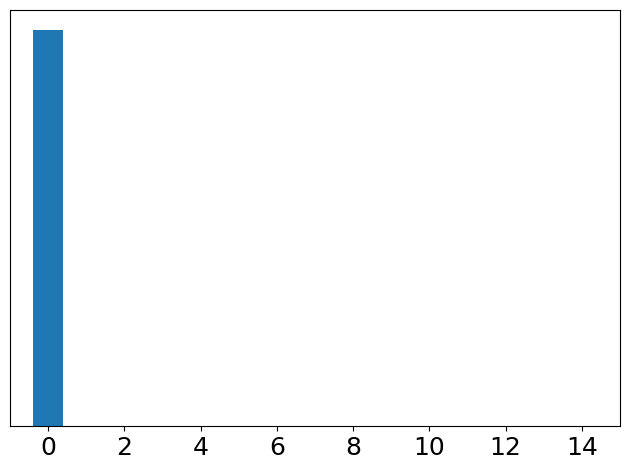

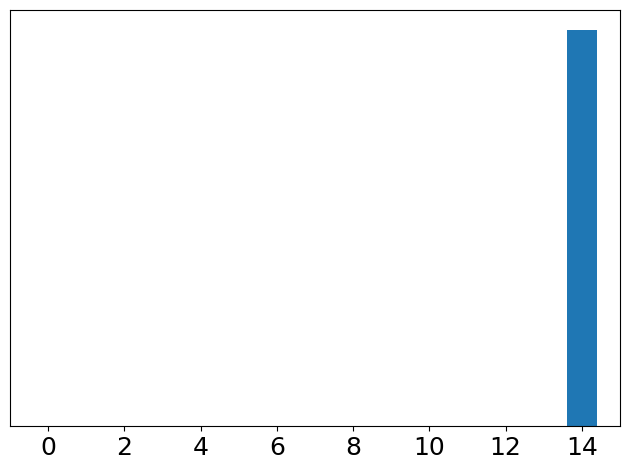

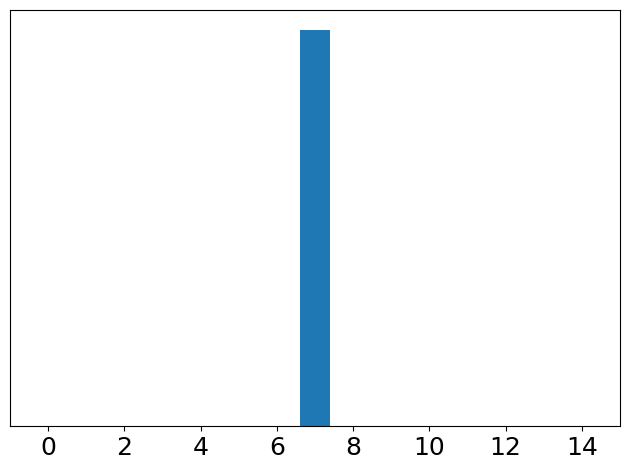

In [43]:
from src.utils import *
plot_centroid_distributions(kmeans_init, X, 3, 0, method='maxdist', num_runs=100)

**Your Answer:**

**Distribution for c1:**
* As expected, the distribution for the first centroid (c1) is a single bar with a height of num_runs, which is 100 in this case.

**Distribution for c2 and c3:**
* Since the "MaxDist" method chooses the next centroid as the data point farthest away from the currently nearest centroid, we can observe that certain data points are chosen much more frequently than others for c2 and c3.((14 and 7))

**Expectations of the "MaxDist" Method:**
* The results align with our expectations of the "MaxDist" method. "MaxDist" tends to select centroids that are maximally distant from the existing centroids.

**Uniqueness of Results**
* The results are unique if we always select the same initiated c1. While the "MaxDist" method is deterministic in the sense that it will always select the farthest data point as the next centroid, the initial choice of the first centroid (c1) can affect which data points are closer or farther from it
* If we choose a different initial data point as c1, we may get a different distribution for c2 and c3, even though the overall behavior aligns with the "MaxDist" method's principle.

#### 2.2 c) Interpreting KMeans++ Initialization (2 Points)

Run `plot_centroid_distributions` using the method **K-Means++** using the code below! The number of clusters is K=3 and the index of the first cluster is 0 (i.e., data point $A$). If the results are unclear, you can increase the value of `num_runs`. Explain the results and discuss whether they meet your expectations of the method **K-Means++**! Use the markdown cell below the plots.

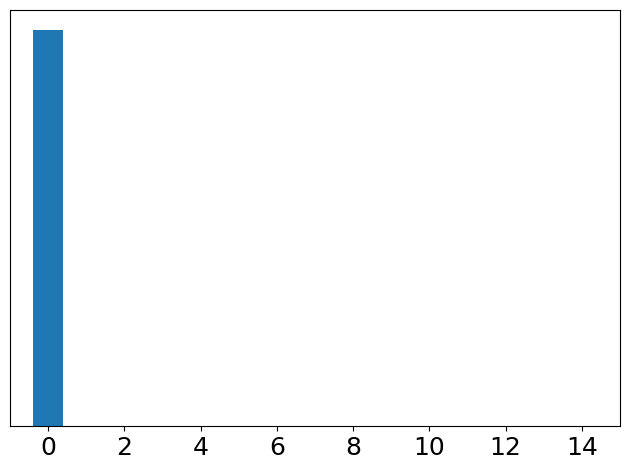

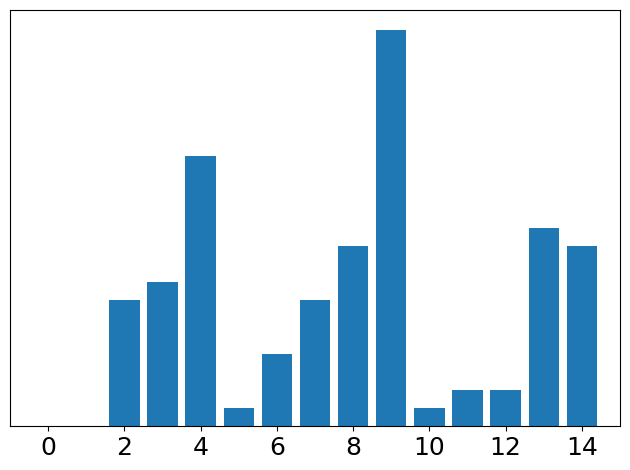

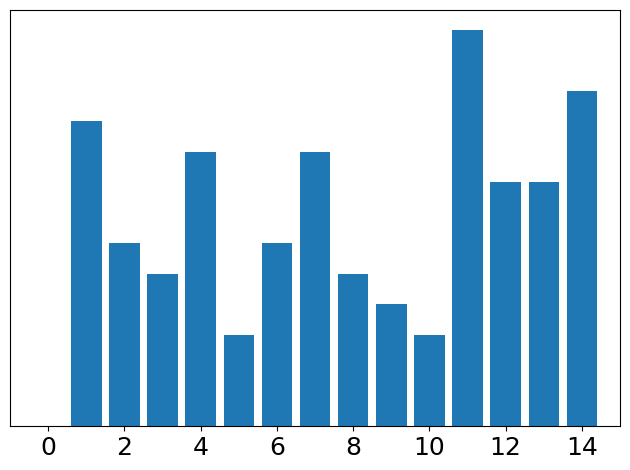

In [45]:
plot_centroid_distributions(kmeans_init, X, 3, 0, method='kmeans++', num_runs=100)

**Your Answer:**

**Distribution for c1:**
* As expected, the distribution for the first centroid (c1) is a single bar with a height of num_runs, which is 100 in this case.

**Distribution for c2 and c3:**
* Unlike the "MaxDist" method, which tends to select the farthest data points as centroids, K-Means++ initialization uses a probabilistic approach based on distances squared. As a result, we observe a more uniform distribution for c2 and c3.
* Data points closer to the initial centroid A (c1) still have a lower chance of being selected as c2 and c3, but the distribution is more balanced compared to "MaxDist."

**Expectations of the "K-Means++" Method:**
* The results align with our expectations of the K-Means++ initialization method. K-Means++ aims to select centroids in such a way that they are spread out and well-distributed across the data space.

**Uniqueness of Results**
* The results are not unique for K-Means++ initialization. While the method's probabilistic nature ensures a degree of randomness in centroid selection, the initial choice of the first centroid (c1) can still affect the final distribution of c2 and c3.


### 2.3 Questions about K-Means (6 Points)

#### 2.3 a) Empty Cluster (3 Points)

**Outline all situations where K-Means may return at least 1 empty cluster!** To address this task, please make the following assumptions:
* The number of samples $N$ in the dataset is $N > 0$
* The number of clusters $K$ when running K-Means is $K \geq 2$
* The initialization of the initial centroids can be arbitrary good or bad

**Your Answer:**

**Bad Initialization:** If the initial centroids are poorly chosen and are close to each other or far away from data points, it's possible for one or more clusters to end up with no data points assigned to them. This can happen when centroids are placed in regions with low data density.

**Outliers:** If there are outliers in the dataset, they can significantly impact the cluster assignments. If a cluster center is initialized near an outlier, it may attract only that outlier as its nearest point, leaving the rest of the data points unassigned to any cluster.

**Inappropriate Choice of K:** If K is set too high compared to the actual number of meaningful clusters in the data, K-Means may struggle to find valid assignments for all clusters, leading to empty clusters.

**Data Skewness:** Data distribution skewness can impact cluster assignments. If the data is skewed towards one region, centroids initialized away from this region might result in empty clusters in that skewed region.

#### 2.3 b) Outlier Detection (3 Points)

Recall the K-Means results in clusterings that are complete, i.e., each data point is assigned to a cluster. In contrast, DBSCAN has the notion of noise, i.e., points that are not part of any cluster, which can be used to identify outliers (see also Task 2). Now let's assume we want to identify outliers in a dataset but only have an implementation for K-Means available.

**Describe how we can use K-Means to identify outliers!** Since the notion of outliers is not well defined, it's not about having a fool-proof solution but to make a well-informed decision to limit the set of data points that are potential outliers.

**Your Answer:**

Weu can use K-Means for outlier identification by first clusteringther data and calculating the distances between each point and its assigned cluster center. Set a threshold to define what constitutes an outlier based on domain knowledge or data characteristics. Any data point with a distance exceeding this threshold can be considered a potential outlier. Inspect these potential outliers to determine whether they are genuine outliers or anomalies.


Initializing a centroid near an outlier in K-Means can potentially aid in identifying it as a separate cluster or a distant data point. However, its effectiveness depends on factors like the centroid initialization method, dataset characteristics, and the definition of outliers. .